## Task objective: To cluster the sample into "site" and "year" based on N concentrations and date

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('BHL_kmeans.xlsx', sheet_name='Data_by_sub')
data.head()

,Site ID,Site No.,Sample date,Time stamp,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Sub11,11,2016-03-31,42460,Base,0.025511,0.001,0.293,18.666667,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sub11,11,2016-04-14,42474,Base,0.041794,0.013,0.040,2.000000,3.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sub11,11,2016-04-28,42488,Base,0.078278,0.001,0.129,39.333333,31.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sub11,11,2016-05-17,42507,Base,0.064980,0.001,0.177,63.333333,37.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sub11,11,2016-05-17,42507,Base,0.064980,0.001,0.177,63.333333,37.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
X = data[['Time stamp', 'Nitrate (mg/L)']]
X.head()

,Time stamp,Nitrate (mg/L)
0,42460,35.3001
1,42474,31.7656
2,42488,30.5188
3,42507,22.9285
4,42507,22.9285


In [4]:
y_true = data['Site No.']
y_true = y_true.to_numpy()
print(type(y_true))

<class 'numpy.ndarray'>


In [5]:
X = X.to_numpy()
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(156, 2)


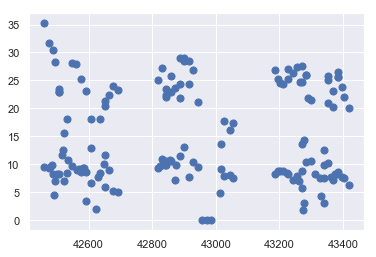

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [30]:
print(y_kmeans)

[4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 5 5 5 5 5
 5 5 5 5 5 5 5 1 1 1 1 1 1 1 4 4 2 2 2 2 0 0 0 0 3 5 5 5 5 1 1 1 1 1 1 4 4
 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 5 5 5 5 5
 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 2 2 2 2 2 2 2 0 0 0 0 0 3 5 5
 5 5 5 1 1 1 1 1]


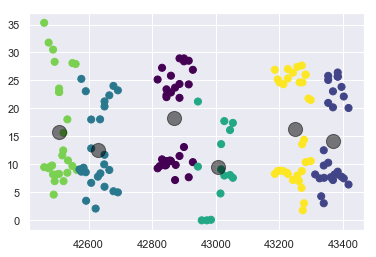

In [31]:
# plots the simulated dataset, colored by its cluster number
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

rseed =  0


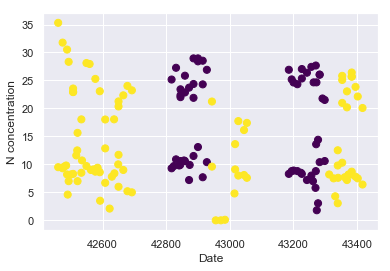

accuracy for fig above =  0.5512820512820513
rseed =  1


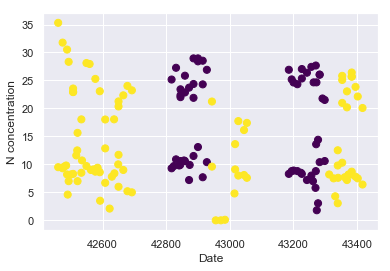

accuracy for fig above =  0.5512820512820513
rseed =  2


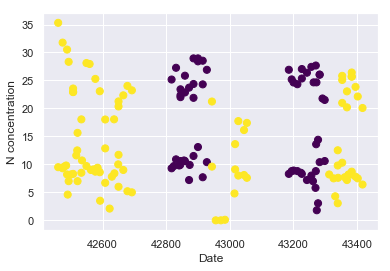

accuracy for fig above =  0.5512820512820513
rseed =  3


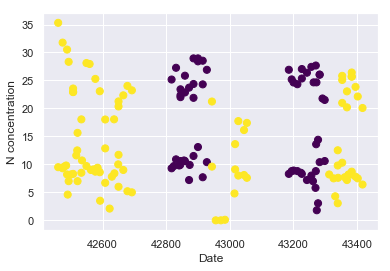

accuracy for fig above =  0.5512820512820513
rseed =  4


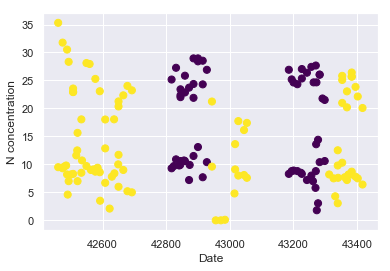

accuracy for fig above =  0.5512820512820513
rseed =  5


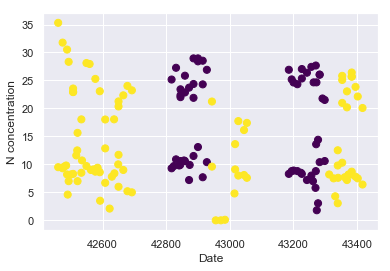

accuracy for fig above =  0.5512820512820513
rseed =  6


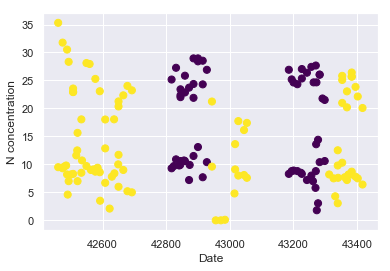

accuracy for fig above =  0.5512820512820513


In [29]:
from sklearn.metrics import pairwise_distances_argmin
from scipy.stats import mode
from sklearn.metrics import accuracy_score
clusters = kmeans.fit_predict(X)

for a in range(0,7):
    print('rseed = ', a)
    def find_clusters(X, n_clusters, rseed=a):
        # 1. Randomly choose clusters
        rng = np.random.RandomState(rseed)
        i = rng.permutation(X.shape[0])[:n_clusters]
        centers = X[i]

        while True:
            # 2a. Assign labels based on closest center
            labels = pairwise_distances_argmin(X, centers)

            # 2b. Find new centers from means of points
            new_centers = np.array([X[labels == i].mean(0)
                                    for i in range(n_clusters)])

            # 2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers

        return centers, labels

    centers, labels = find_clusters(X, 6)
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(y_true[mask])[0] #Takes the mode of the true label
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
    plt.xlabel('Date')
    plt.ylabel('N concentration')
    plt.show()
    print('accuracy for fig above = ', accuracy_score(y_true, labels)) 

## Does not cluster properly; Try SpectralClustering approach

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0, 0.5, 'N concentration')

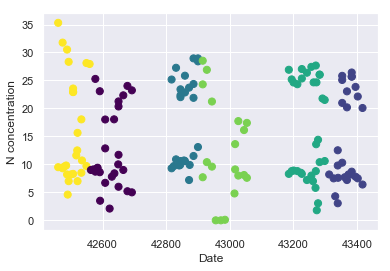

In [27]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.xlabel('Date')
plt.ylabel('N concentration')

## Spectral clustering did not seem to perform any better .
### The original kmeans were only able to achieve 55% accuracy (changing rseed also did not appear to improve the prediction). Clustering might not be suitable for this task or additional transformation is needed to segregate the data.
